**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral

DATASET:

https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news



In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [4]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1", header=None, names = ['Sentiment', 'News Headline'])
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [7]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [8]:
y=df['Sentiment'].values
y.shape

(4846,)

In [9]:
x=df['News Headline'].values
x.shape

(4846,)

**Train-test split**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [12]:
x_train.shape

(2907,)

In [13]:
y_train.shape

(2907,)

In [14]:
x_test.shape

(1939,)

In [15]:
y_test.shape

(1939,)

In [16]:
x_train

array(["News Corp. 's MySpace.com Web site will display submissions for the expanded Broadband Emmy Awards as part of an effort to identify aspiring video artists .",
       'The company reported net sales of 302 mln euro $ 441.6 mln and an operating margin of 16 pct in 2006 .',
       'Mr Ashley , deputy executive chairman of Sports Direct , sold a 43pc stake in the company for more than pounds 900m at the time of the float .',
       ...,
       'In Finland , metal sector company Componenta is laying off temporarily the staff of its Pori mill from Christmas 2008 till 6 January 2009 .',
       "Financial terms were n't disclosed .",
       'The GyPSii mobile social networking application is available in China with both Chinese and English language support .'],
      dtype=object)

In [17]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,News Corp. 's MySpace.com Web site will displa...,neutral
1,The company reported net sales of 302 mln euro...,neutral
2,"Mr Ashley , deputy executive chairman of Sport...",neutral
3,20 October 2010 - Finnish environmental manage...,negative
4,Aspo 's net sales in 2006 totaled EUR 225.9 mi...,neutral


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [19]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,Atria Group is a leading Scandinavian meat pro...,neutral
1,The share subscription period for stock option...,neutral
2,Finnish Cargotec has been awarded a significan...,neutral
3,COPYRIGHT AFX News and AFX Financial News Logo...,negative
4,The manager is critical of politicians ' failu...,neutral


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


**Pre-processing**

In [21]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [23]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,News Corp s MySpacecom Web site will display s...,neutral
1,The company reported net sales of 302 mln euro...,neutral
2,Mr Ashley deputy executive chairman of Sports...,neutral
3,20 October 2010 Finnish environmental managem...,negative
4,Aspo s net sales in 2006 totaled EUR 2259 mill...,neutral


In [24]:
import nltk
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
    


In [27]:
#sample!
generate_N_grams("The sun rises in the east",3)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun rises', 'sun rises east']

**Create unigrams**

In [28]:
from collections import defaultdict

In [29]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [30]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'EBITDA', 'EUR116m', 'compared', 'EUR115m', '', 'corresponding', 'EBITDA', 'margin', '33', '', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7', '', '']
Sentence after removing stopwords: ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR415', '000', 'EUR7', '4', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Quarterly', 'diluted', 'EPS', 'continuing', 'operations', 'came', '021', 'eur', '', 'compared', 'last', 'year', '012', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'ordered', 'key', 'production', 'equipment', 'new', 'glass', 'nonwovens', 'production', 'line', 'Russian', 'Tver', 'Mill', 'Finnish', 'Vaahto', 'Pulp', '', 'Paper', 'Machinery', '', 'part', 'Vaahto', 'Group', '', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '16', 'mn', 'EUR', '11', 'mn', 'corresponding', 'period', '200

In [31]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'The': 177,
             'EBITDA': 5,
             'EUR116m': 1,
             'compared': 44,
             'EUR115m': 1,
             '': 2285,
             'corresponding': 43,
             'margin': 5,
             '33': 4,
             'Cargo': 2,
             'volume': 6,
             'grew': 22,
             '7': 15,
             'In': 37,
             'first': 38,
             'nine': 17,
             'months': 23,
             '2010': 68,
             'company': 143,
             'net': 108,
             'loss': 42,
             'narrowed': 12,
             'EUR415': 1,
             '000': 11,
             'EUR7': 3,
             '4': 10,
             'period': 92,
             '2009': 69,
             'Quarterly': 1,
             'diluted': 2,
             'EPS': 16,
             'continuing': 3,
             'operations': 32,
             'came': 2,
             '021': 2,
             'eur': 32,
             'last': 23,
             'year': 85,
  

In [32]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('The', 177), ('EBITDA', 5), ('EUR116m', 1), ('compared', 44), ('EUR115m', 1), ('', 2285), ('corresponding', 43), ('margin', 5), ('33', 4), ('Cargo', 2), ('volume', 6), ('grew', 22), ('7', 15), ('In', 37), ('first', 38), ('nine', 17), ('months', 23), ('2010', 68), ('company', 143), ('net', 108), ('loss', 42), ('narrowed', 12), ('EUR415', 1), ('000', 11), ('EUR7', 3), ('4', 10), ('period', 92), ('2009', 69), ('Quarterly', 1), ('diluted', 2), ('EPS', 16), ('continuing', 3), ('operations', 32), ('came', 2), ('021', 2), ('eur', 32), ('last', 23), ('year', 85), ('012', 2), ('Finnish', 114), ('Ahlstrom', 2), ('Corporation', 24), ('ordered', 4), ('key', 3), ('production', 18), ('equipment', 21), ('new', 55), ('glass', 3), ('nonwovens', 2), ('line', 11), ('Russian', 6), ('Tver', 1), ('Mill', 2), ('Vaahto', 8), ('Pulp', 3), ('Paper', 6), ('Machinery', 2), ('part', 9), ('Group', 28), ('Operating', 30), ('profit', 115), ('rose', 64), ('EUR', 234), ('16', 6), ('mn', 136), ('11', 8), ('

In [33]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

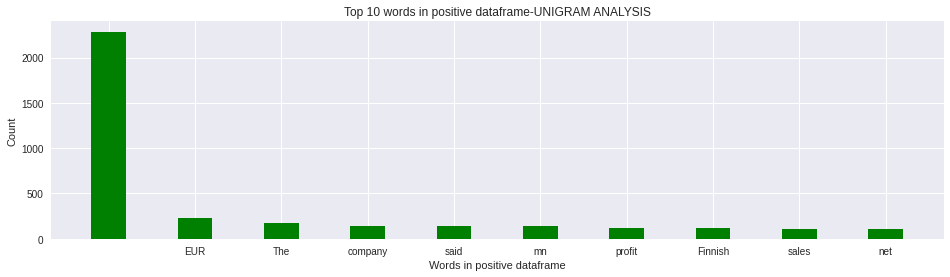

In [34]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [35]:
df_positive.head(10)

,0,1
0,,2285
1,EUR,234
2,The,177
3,company,143
4,said,141
5,mn,136
6,profit,115
7,Finnish,114
8,sales,113
9,net,108


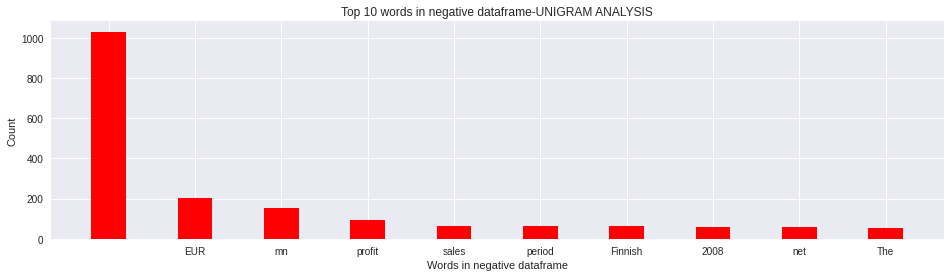

In [36]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [37]:
df_negative.head(10)

,0,1
0,,1030
1,EUR,203
2,mn,151
3,profit,93
4,sales,64
5,period,64
6,Finnish,63
7,2008,60
8,net,58
9,The,56


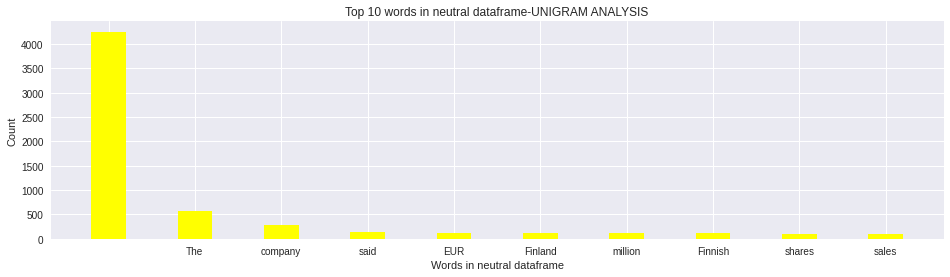

In [38]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [39]:
df_neutral.head(10)

,0,1
0,,4253
1,The,579
2,company,292
3,said,140
4,EUR,127
5,Finland,127
6,million,124
7,Finnish,123
8,shares,102
9,sales,100


**Creating bigrams**

In [40]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [41]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'EBITDA', 'EUR116m', 'compared', 'EUR115m', '', 'corresponding', 'EBITDA', 'margin', '33', '', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7', '', '']
Sentence after removing stopwords: ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR415', '000', 'EUR7', '4', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Quarterly', 'diluted', 'EPS', 'continuing', 'operations', 'came', '021', 'eur', '', 'compared', 'last', 'year', '012', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'ordered', 'key', 'production', 'equipment', 'new', 'glass', 'nonwovens', 'production', 'line', 'Russian', 'Tver', 'Mill', 'Finnish', 'Vaahto', 'Pulp', '', 'Paper', 'Machinery', '', 'part', 'Vaahto', 'Group', '', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '16', 'mn', 'EUR', '11', 'mn', 'corresponding', 'period', '200

In [42]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

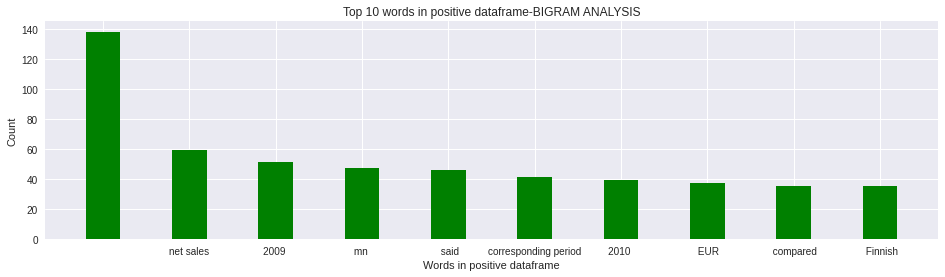

In [43]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [44]:
df_positive2.head(10)

,0,1
0,,138
1,net sales,59
2,2009,51
3,mn,47
4,said,46
5,corresponding period,41
6,2010,39
7,EUR,37
8,compared,35
9,Finnish,35


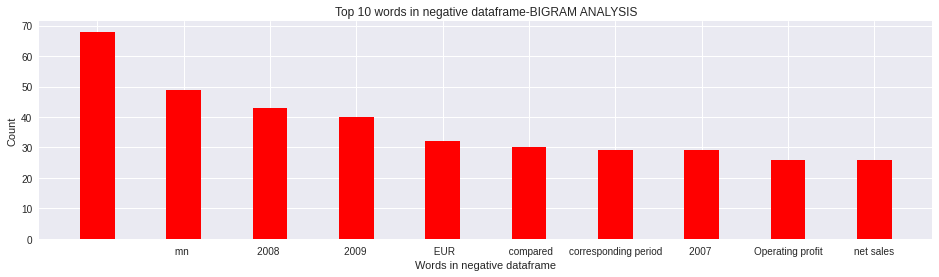

In [45]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [46]:
df_negative2.head(10)

,0,1
0,,68
1,mn,49
2,2008,43
3,2009,40
4,EUR,32
5,compared,30
6,corresponding period,29
7,2007,29
8,Operating profit,26
9,net sales,26


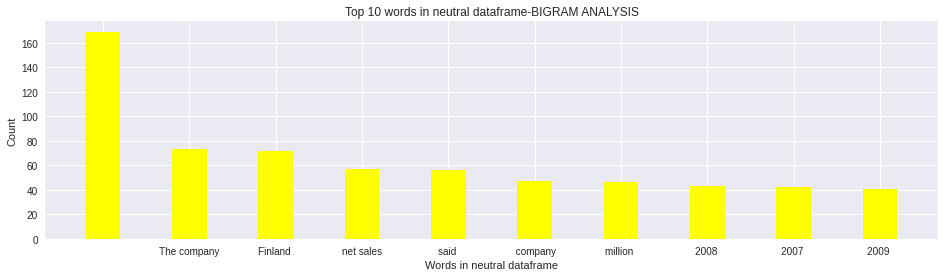

In [47]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [48]:
df_neutral2.head(10)

,0,1
0,,169
1,The company,73
2,Finland,72
3,net sales,57
4,said,56
5,company,47
6,million,46
7,2008,43
8,2007,42
9,2009,41


**Creating trigrams**

In [49]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [50]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['The', 'EBITDA', 'EUR116m', 'compared', 'EUR115m', '', 'corresponding', 'EBITDA', 'margin', '33', '', '']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7', '', '']
Sentence after removing stopwords: ['In', 'first', 'nine', 'months', '2010', '', 'company', 'net', 'loss', 'narrowed', 'EUR415', '000', 'EUR7', '4', 'corresponding', 'period', '2009', '']
Sentence after removing stopwords: ['Quarterly', 'diluted', 'EPS', 'continuing', 'operations', 'came', '021', 'eur', '', 'compared', 'last', 'year', '012', 'eur', '']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'ordered', 'key', 'production', 'equipment', 'new', 'glass', 'nonwovens', 'production', 'line', 'Russian', 'Tver', 'Mill', 'Finnish', 'Vaahto', 'Pulp', '', 'Paper', 'Machinery', '', 'part', 'Vaahto', 'Group', '', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '16', 'mn', 'EUR', '11', 'mn', 'corresponding', 'period', '200

In [51]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

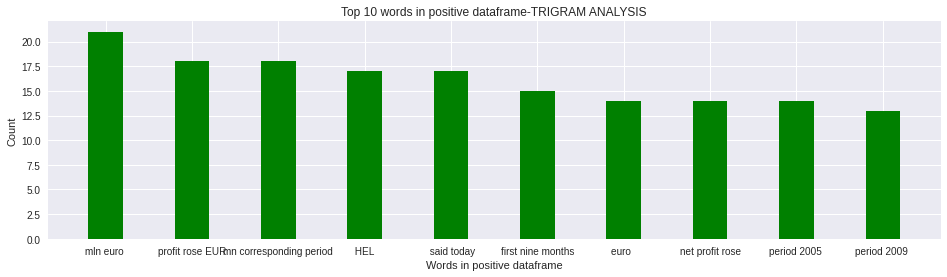

In [52]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [53]:
df_positive3.head(10)

,0,1
0,mln euro,21
1,profit rose EUR,18
2,mn corresponding period,18
3,HEL,17
4,said today,17
5,first nine months,15
6,euro,14
7,net profit rose,14
8,period 2005,14
9,period 2009,13


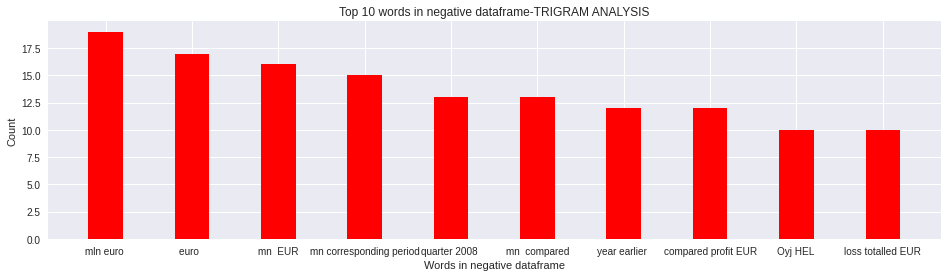

In [54]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [55]:
df_negative3.head(10)

,0,1
0,mln euro,19
1,euro,17
2,mn EUR,16
3,mn corresponding period,15
4,quarter 2008,13
5,mn compared,13
6,year earlier,12
7,compared profit EUR,12
8,Oyj HEL,10
9,loss totalled EUR,10


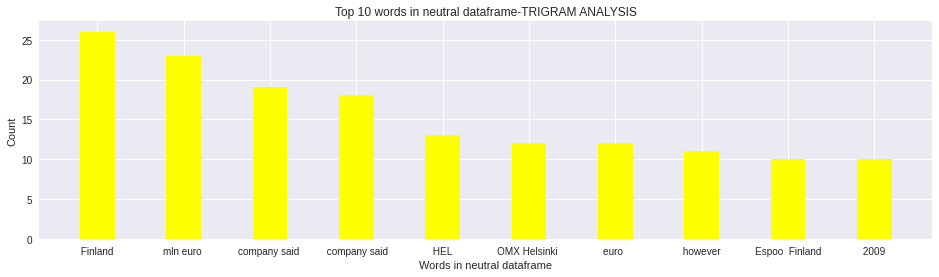

In [56]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [57]:
df_neutral3.head(10)

,0,1
0,Finland,26
1,mln euro,23
2,company said,19
3,company said,18
4,HEL,13
5,OMX Helsinki,12
6,euro,12
7,however,11
8,Espoo Finland,10
9,2009,10


**Using CountVectorizer()**

-can also b used to check the most common bigrams